In [ ]:
from src.processing import RoiAnalyser

In [2]:
DATA_DIR = "data" # input data directory path
OUTPUT_DIR = "out" # output results directory path
PLOT = True # whether to show plots

SIZE_THRESHOLD = 3000 # size threshold for filtering clusters   

A1ROI1_02_2_1Z4_Confocal DAPI_001.tif A1ROI1_02_3_1Z4_Confocal GFP_001.tif A1ROI1_02_4_1Z4_Confocal TRITC_001.tif

Analysing: A1ROI1, Z4
Step 1: Preprocessing DAPI image...
Step 2: Finding contours...
  Found 4 clusters


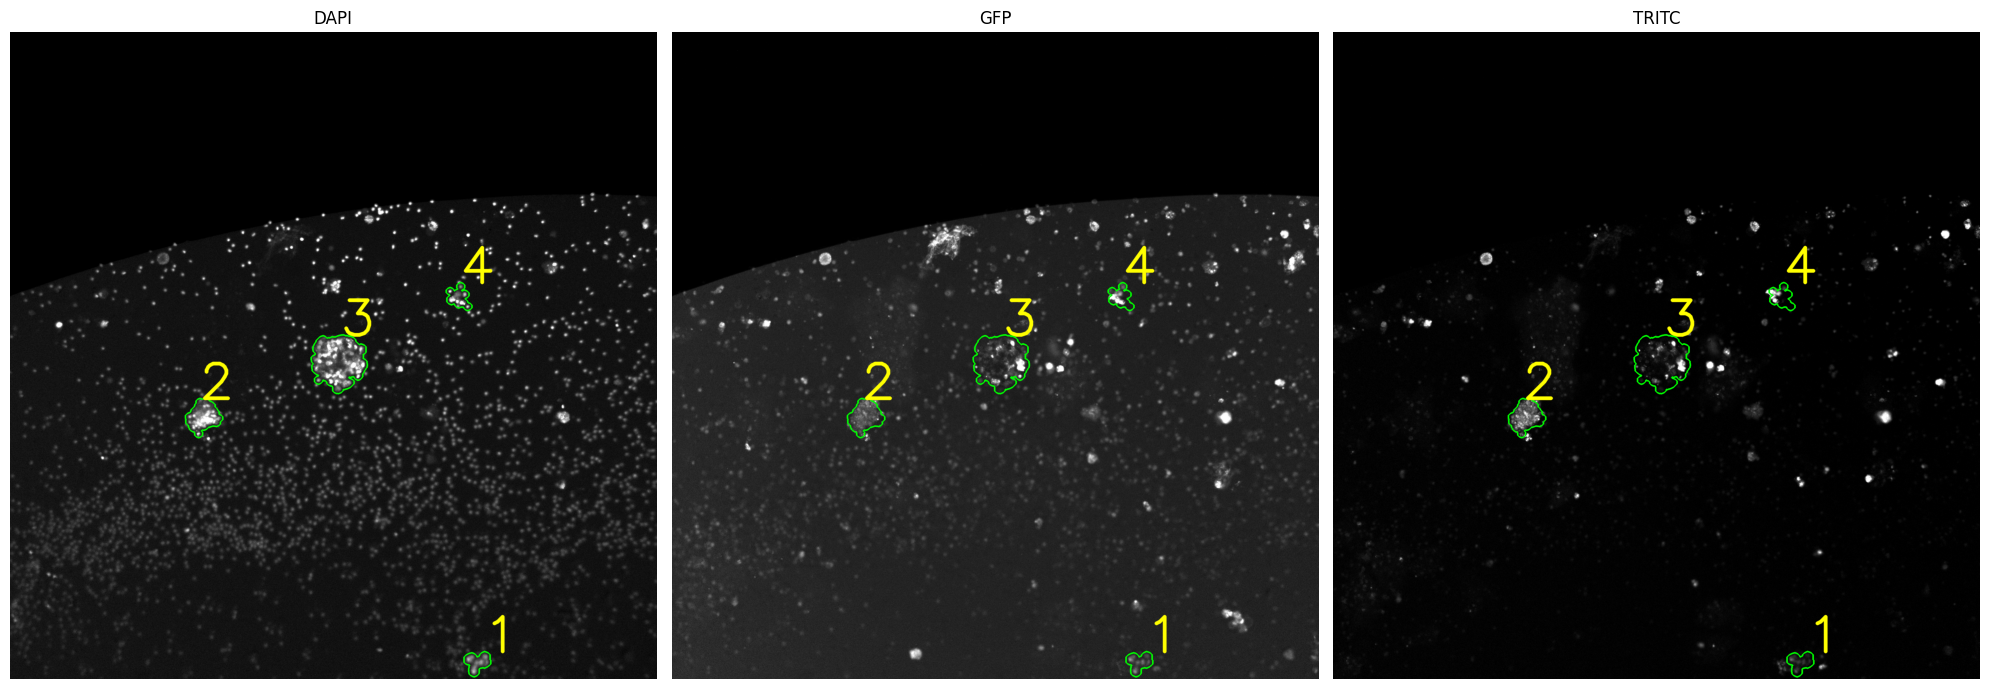

Step 3: Building GFP and TRITC histograms for clusters...


In [3]:
dapi_path = 'A1ROI1_02_2_1Z4_Confocal DAPI_001.tif' # change me

analyser = RoiAnalyser(DATA_DIR, OUTPUT_DIR, PLOT, SIZE_THRESHOLD)
# analyser = RoiAnalyser(DATA_DIR, OUTPUT_DIR, PLOT, SIZE_THRESHOLD, opening_kernel=13, dilatation_kernel=7, dilatation_iter=1, opening_iter=2)
clusters, channel_histograms, figure = analyser.run_analysis(dapi_path)

(**OPTIONAL**) Run the histogram analysis for different depths

Step 4: Repeat for additional Zs...
Repeating for:  Z6
A1ROI1_02_2_1Z6_Confocal DAPI_001.tif A1ROI1_02_3_1Z6_Confocal GFP_001.tif A1ROI1_02_4_1Z6_Confocal TRITC_001.tif


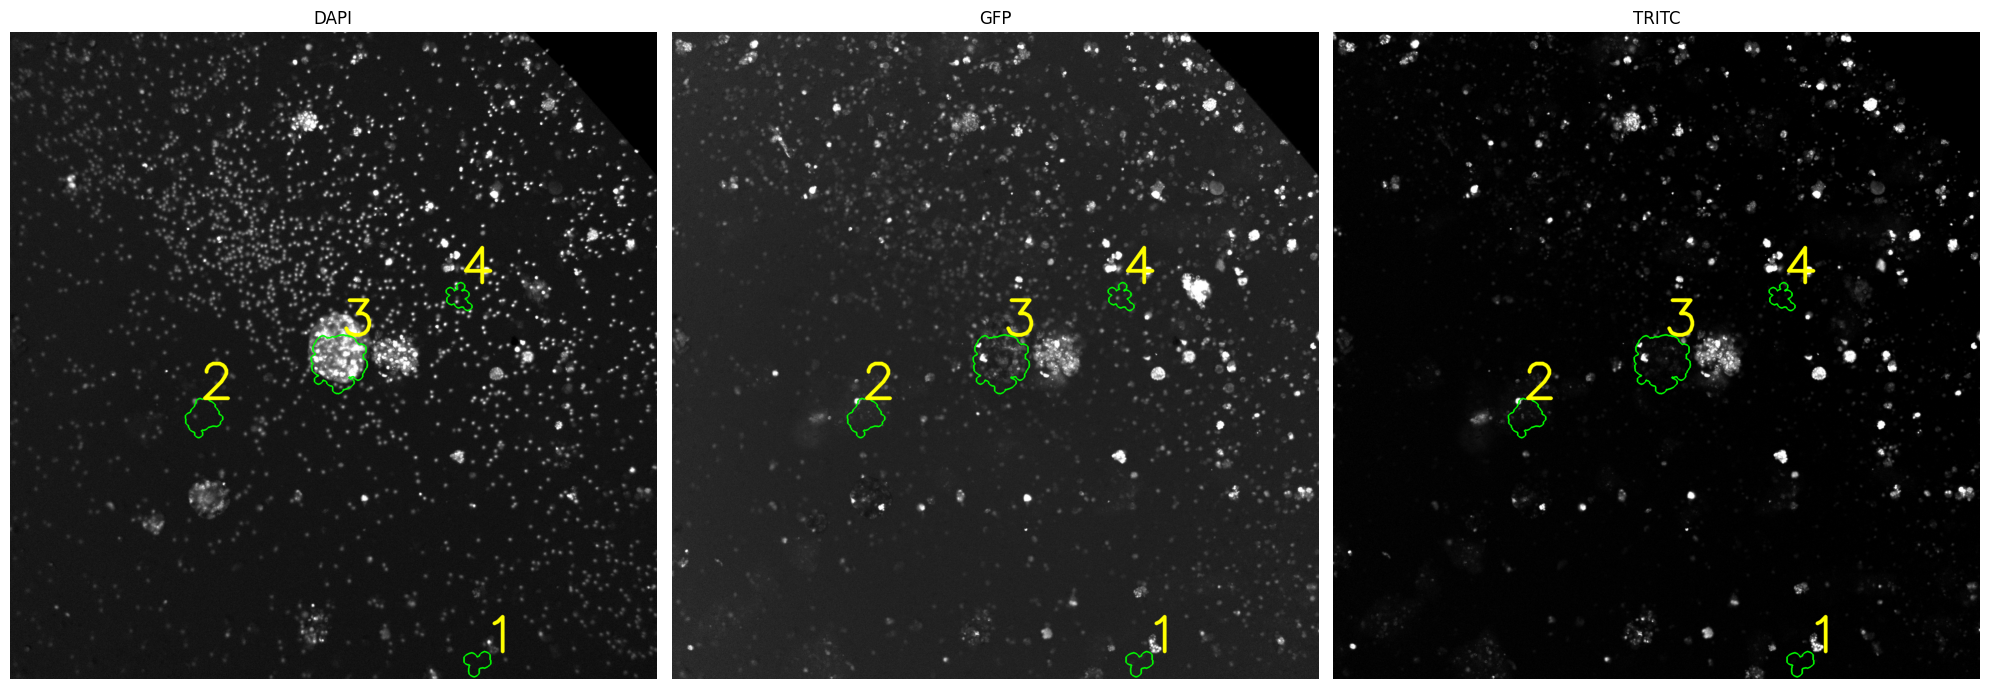

In [4]:
z = "Z6" # change me

print("Step 4: Repeat for additional Zs...")
channels = analyser.repeat_for_additional_images(z, dapi_path, clusters, channel_histograms)

Save the calculated histograms as `.csv` files

In [5]:
print("Step 5: Saving histograms")
out_files = analyser.save_histogram(channel_histograms, figure)
print('-----------------------------')
print("Done :D")

Step 5: Saving histograms

Saving histogram data for ROI: A1ROI1
  Successfully saved GFP histogram data to out/A1ROI1_GFP.csv
  Successfully saved TRITC histogram data to out/A1ROI1_TRITC.csv
-----------------------------
Done :D


In [6]:
out_files

{'GFP': 'out/A1ROI1_GFP.csv', 'TRITC': 'out/A1ROI1_TRITC.csv'}

In [ ]:
for name, file_name in out_files.items():
    analyser.apopnec_ratio(file_name)
    print(f'|Done with {name}|\n')